# imread

* 返回：shape = [H, W, C]
* 默认返回：BGR 颜色
* cvtColor 可以从BGR 转化成 RGB 

(2202, 1606, 3) 1


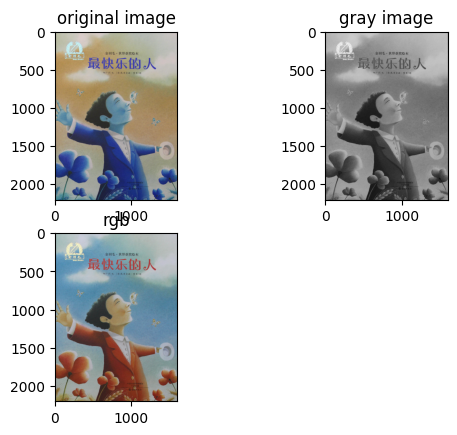

In [114]:
import os
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('./0.JPG')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# plt plot 这个格式的image 才能正常显示。
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.IMREAD_COLOR
print(img.shape, cv2.IMREAD_COLOR)
# Displaying the image 
# Window name in which image is displayed
# window_name = 'Image'
# cv2.imshow(window_name, img)

plt.subplot(221)
plt.imshow(img)
plt.title('original image')
plt.subplot(222)
plt.imshow(gray, 'gray')
plt.title('gray image')
plt.subplot(223)
plt.imshow(rgb_img)
plt.title('rgb')
# plt.subplot(224)
# plt.imshow(dst_NS)
# plt.title('NS')

# plt.tight_layout()
plt.show()

# 读取带中文路径的文件

In [1]:
import cv2
import glob
import numpy as np

def image_read(file_path: str):
    cv_img = cv2.imdecode(np.fromfile(file_path, dtype=np.uint8), cv2.IMREAD_COLOR)
    return cv_img
    

pics = glob.glob("D:/code/spiders/BaiduImageSpider/李沁/*")
# print(pics)

def main():    
    # data_path = "D:/code/spiders/BaiduImageSpider/李沁"
    fps = 3          # 视频帧率
    size = (640, 480) # 需要转为视频的图片的尺寸
    video = cv2.VideoWriter("output.avi", cv2.VideoWriter_fourcc('I', '4', '2', '0'), fps, size)
    
    for pic in pics[:100]:
        print(pic)  
        img = image_read(pic)
        print(img.shape)
        img = cv2.resize(img, size)
        i = 0
        while i < fps:
            video.write(img)
            i += 1
    
    video.release()
    cv2.destroyAllWindows()


# main()

c:\Users\73915\.conda\envs\open_editor\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\73915\.conda\envs\open_editor\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\73915\.conda\envs\open_editor\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\73915\.conda\envs\open_editor\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# face recognition

In [1]:
import cv2

# 加载人脸分类器
# face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# 读取图像
image = cv2.imread('./1.JPEG')

# 将图像转换为灰度图像
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 进行人脸检测
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
# faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# 在图像上绘制人脸框
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

# 显示结果图像
# cv2.imshow('Face Detection', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()




c:\Users\73915\.conda\envs\open_editor\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\73915\.conda\envs\open_editor\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\73915\.conda\envs\open_editor\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\73915\.conda\envs\open_editor\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


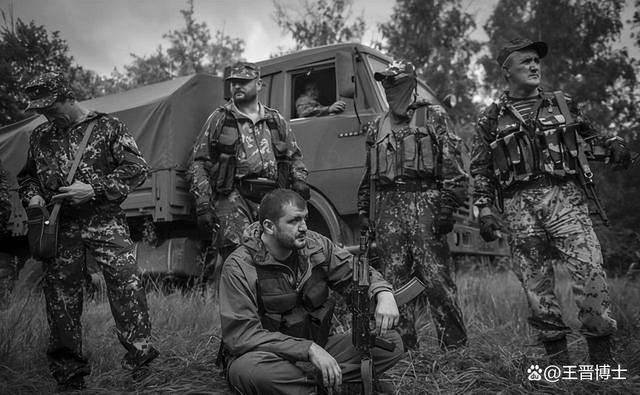

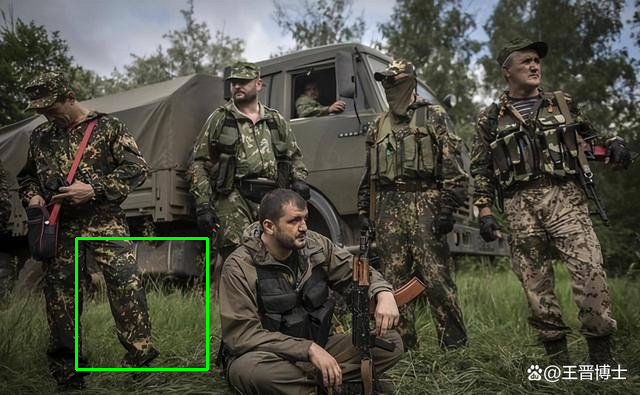

In [2]:
from PIL import Image
display(Image.fromarray(gray))
display(Image.fromarray(image[:, :, ::-1]))

# inpaint

True
(395, 640, 3)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
::-1 shape: (395, 640, 3)


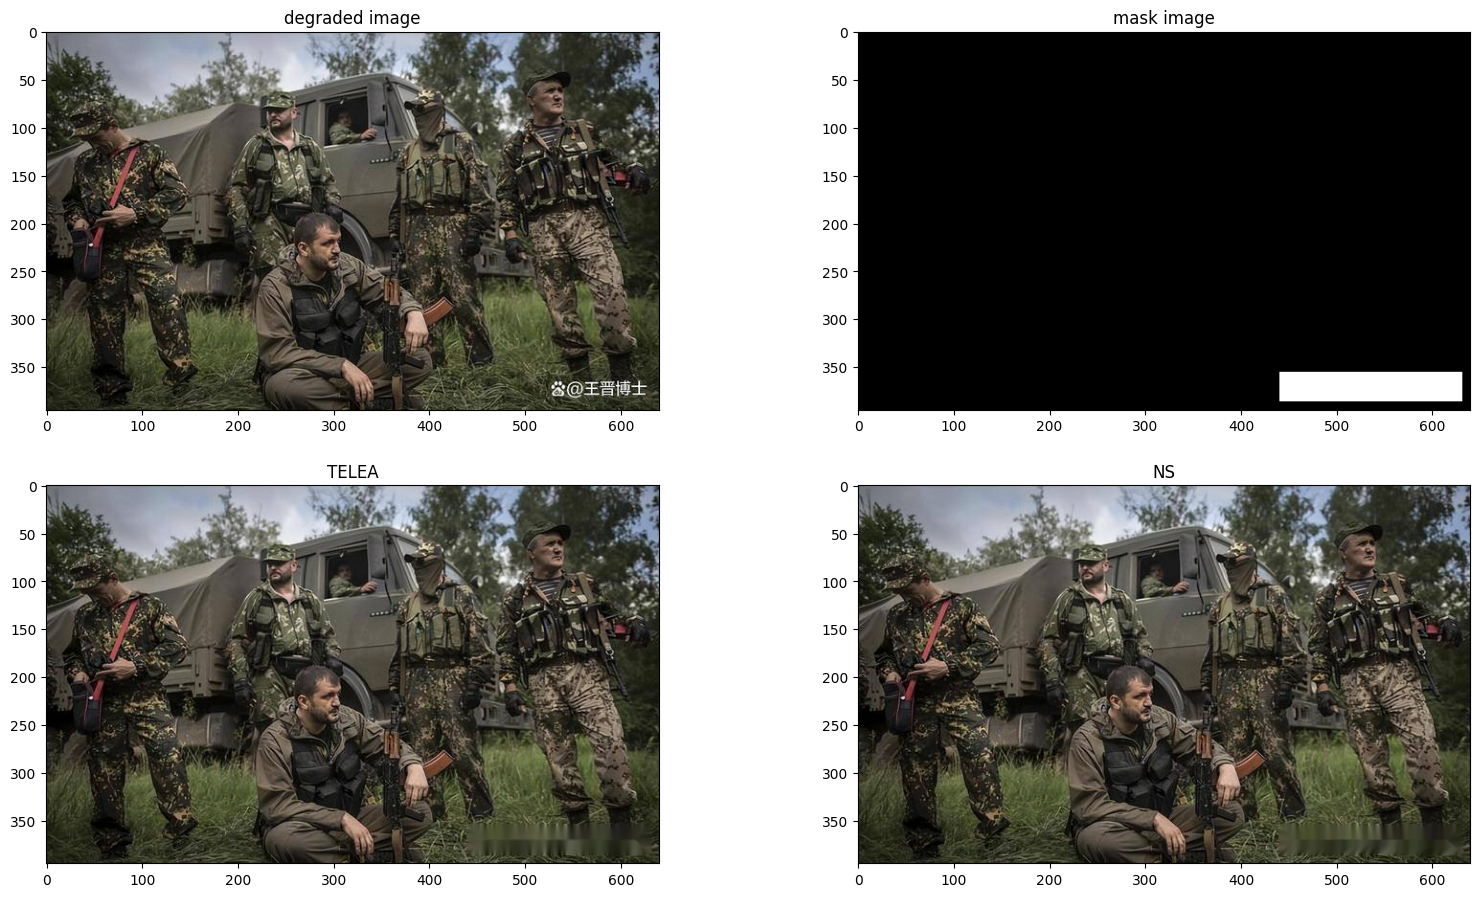

In [117]:
input_img = "D:/wps/剪印/auto_generate/5224ab7054cf4e33243f1f3e14f31371-普京开始整肃清算，瓦格纳4名军官被逮捕，“末日将军/4c8f38626eacf75cddc64eb726545faf.JPEG"
input_img = "1.JPEG"

%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np
from pathlib import Path
from copy import deepcopy

plt.rcParams["figure.figsize"] = (19.2, 10.8)

path_input = Path(input_img)
print(path_input.exists())

# img = image_read(input_img)
img = cv2.imread(input_img) # BGR
# mask = cv2.imread(input_img, 0)
# mask[:,:] = 255
mask = np.zeros(img.shape[:2], dtype=np.uint8)
print(img.shape)
print(mask)

_shape = img.shape
width = 200
height = 40
left_top_x = _shape[1] - width
left_top_y = _shape[0] - height

pad = 10

point1 = [left_top_x, left_top_y]
point2 = [left_top_x + width, left_top_y]
point3 = [left_top_x + width - pad, left_top_y + height - pad]
# point3 = [left_top_x +  pad, left_top_y + pad]
point4 = [left_top_x, left_top_y + height]

# point1 = [_shape[0] - 150, _shape[1] - 150]
# point2 = [_shape[0] - 150, _shape[1]]
# point3 = [_shape[0], _shape[1]]
# point4 = [_shape[0], _shape[1] - 150]

polygon = np.array([point1, point2, point3, point4], np.int32)

# mask = deepcopy(img)
# cv2.fillConvexPoly(mask, polygon, (255, 255, 255))
cv2.rectangle(mask, tuple(point1), tuple(point3), (255, 255, 255), -1)
# cv2.fillPoly

img2 = img[:,:, ::-1]
print(f'::-1 shape: {img2.shape}')
# # plt.imshow(img2)
# plt.imshow(img)
# plt.show()
# cv2.imshow("img", img)
# cv2.startWindowThread()
# cv2.namedWindow("preview")
# cv2.imshow("preview", img)

inpaintRadius=2
dst_TELEA = cv2.inpaint(img, mask, inpaintRadius, cv2.INPAINT_TELEA)
dst_NS = cv2.inpaint(img, mask, inpaintRadius, cv2.INPAINT_NS)

plt.subplot(221)
plt.imshow(img2)
plt.title('degraded image')
plt.subplot(222)
plt.imshow(mask, 'gray')
plt.title('mask image')
plt.subplot(223)
plt.imshow(dst_TELEA[:, :, ::-1])
plt.title('TELEA')
plt.subplot(224)
plt.imshow(dst_NS[:, :, ::-1])
plt.title('NS')

# plt.tight_layout()
plt.show()

In [ ]:
mask = np.zeros(img.shape[:2], dtype=np.uint8)

# H, W, C=3
_shape = img.shape
# _shape = img.shape[:2]
print(_shape)
left_top_x = np.ceil(3/4 * _shape[1])
left_top_y = _shape[0] - 100

point1 = [left_top_x, left_top_y]
point2 = [_shape[0] - 100, left_top_y]
point4 = [left_top_x, _shape[1]]
point3 = [_shape[0], _shape[1]]

# point1 = [_shape[0] - 150, _shape[1] - 150]
# point2 = [_shape[0] - 150, _shape[1]]
# point3 = [_shape[0], _shape[1]]
# point4 = [_shape[0], _shape[1] - 150]

polygon = np.array([point1, point2, point3, point4], np.int32)
# polygon = np.array([[27, 175], [250, 150], [250, 250], [24, 370]], np.int32)

print(polygon, mask.shape)
# cv2.fillConvexPoly(mask, polygon, (255, 255, 255))
cv2.fillConvexPoly(img, polygon, (255, 255, 255))
# cv2.fillConvexPoly(mask, polygon, (0, 0, 0))
# image = cv2.add(img, np.zeros(np.shape(img), dtype=np.uint8), mask=mask)

# plt.imshow(mask)
plt.imshow("image", img)
# print(image.shape)
# plt.imshow(mask)

In [ ]:
plt.imshow("image", img)